In [1]:
import ml_model_functions
import numpy as np
import importlib
from ml_model_functions import *

# Modul neu laden
importlib.reload(ml_model_functions)

<module 'ml_model_functions' from '/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/models/fdm/ml_model_functions.py'>

In [38]:
# Simulationsparameter
T_C = 20  # Temperatur [°C]
M_r = 136  # Molekülmasse [g/mol]
T = 3600 * 24 * 10  # Gesamte Simulationszeit [s]
dt = 1000  # Zeitschrittgröße [s]


d_nx_ratios = np.logspace(-2,-3, num = 50)
print(d_nx_ratios)

# Initialisiere ein Array für die Ergebnisse (2 Spalten: d_nx_ratio und Mass Error)
results = np.zeros((len(d_nx_ratios), 2))

# Fehlerbetrachtung für verschiedene d_nx_ratios
for i, d_nx_ratio in enumerate(d_nx_ratios):
    print(f"Simulating for d_nx_ratio = {d_nx_ratio}")

    # Definition der Schichten
    layers = [
        Layer(material='LDPE', d=0.2, nx=int(0.2 / d_nx_ratio), C_init=1000.0),
        Layer(material='Kontaktphase', d=1.0, nx=int(1.0 / d_nx_ratio), C_init=0.0)
    ]

    # Berechnung der Diffusionskoeffizienten
    for layer in layers:
        layer.set_diffusion_coefficient(M_r, T_C)

    # Führe die Simulation durch
    C_values, C_init, total_masses, x, partitioning_checks = run_simulation(layers, T, dt)

    # Berechne den anfänglichen Fehler in der Gesamtmasse
    total_masses_init = np.trapz(C_init, x)
    
    # # Plot und Berechnung der Massenerhaltung
    # plot_mass_conservation(total_masses, total_masses_init, T, len(C_values), plot_interval=1)

    # Speichere den Fehler in das Array
    rel_deviation = np.max(((np.array(total_masses) - total_masses_init) / total_masses_init) * 100)
    # mass_error = np.max(np.abs(np.array(total_masses) - total_masses_init))
    results[i, 0] = d_nx_ratio  # Speichere das d_nx_ratio
    results[i, 1] = rel_deviation  # Speichere den zugehörigen Mass Error


[0.01       0.00954095 0.00910298 0.00868511 0.00828643 0.00790604
 0.00754312 0.00719686 0.00686649 0.00655129 0.00625055 0.00596362
 0.00568987 0.00542868 0.00517947 0.00494171 0.00471487 0.00449843
 0.00429193 0.00409492 0.00390694 0.00372759 0.00355648 0.00339322
 0.00323746 0.00308884 0.00294705 0.00281177 0.0026827  0.00255955
 0.00244205 0.00232995 0.002223   0.00212095 0.00202359 0.0019307
 0.00184207 0.00175751 0.00167683 0.00159986 0.00152642 0.00145635
 0.0013895  0.00132571 0.00126486 0.00120679 0.0011514  0.00109854
 0.00104811 0.001     ]
Simulating for d_nx_ratio = 0.01
Simulating for d_nx_ratio = 0.009540954763499945
Simulating for d_nx_ratio = 0.009102981779915217
Simulating for d_nx_ratio = 0.008685113737513529
Simulating for d_nx_ratio = 0.008286427728546842
Simulating for d_nx_ratio = 0.0079060432109077
Simulating for d_nx_ratio = 0.007543120063354615
Simulating for d_nx_ratio = 0.0071968567300115215
Simulating for d_nx_ratio = 0.006866488450042998
Simulating for d_

KeyboardInterrupt: 

In [2]:
# Speichere die Ergebnisse in einer Datei
np.save('/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/Fehlerbetrachtung/parametervariation_results-2.npy', results)

NameError: name 'results' is not defined

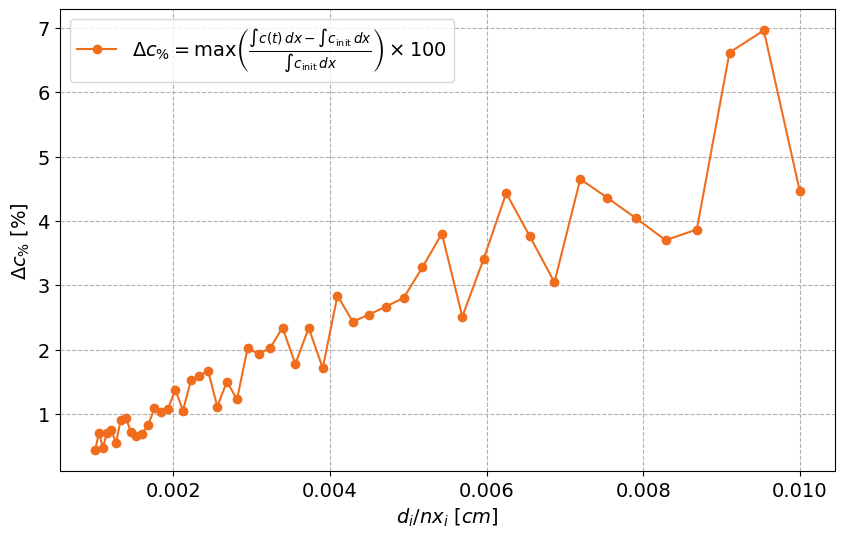

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Lade die gespeicherten Ergebnisse der Fehlerbetrachtung
results = np.load('/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/Fehlerbetrachtung/parametervariation_results.npy')

# Extrahiere die d_nx_ratios und die zugehörigen Mass Errors
d_nx_ratios = results[:, 0]
mass_errors = results[:, 1]

# Erstelle einen Plot der Mass Errors in Abhängigkeit der d_nx_ratios
plt.figure(figsize=(10, 6))
plt.plot(d_nx_ratios, mass_errors, marker='o', color="#F06D1D", label=r'$\Delta c_{{\%}} = \max\left(\frac{\int c(t) \, dx - \int c_{\mathrm{init}} \, dx}{\int c_{\mathrm{init}} \, dx}\right) \times 100$')

# Setze die Achsen auf eine logarithmische Skala
# plt.xscale('log')
# plt.yscale('log')

# Beschriftungen und Titel
plt.xlabel('$d_{{i}}/nx_{{i}}$ $[cm]$', fontsize=14)
plt.ylabel("$\Delta c_{{\%}}$ $[\%]$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Zeige den Plot an
plt.grid(True, which="both", ls="--")
plt.savefig("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/ML-Modell/erroranalysis/error-d_nx-2.pdf", )
plt.show()

In [8]:
d_nx_ratios = results[:, 0]
d_nx_ratios[::-1]
d_nx_ratios[:]

array([0.01      , 0.00954095, 0.00910298, 0.00868511, 0.00828643,
       0.00790604, 0.00754312, 0.00719686, 0.00686649, 0.00655129,
       0.00625055, 0.00596362, 0.00568987, 0.00542868, 0.00517947,
       0.00494171, 0.00471487, 0.00449843, 0.00429193, 0.00409492,
       0.00390694, 0.00372759, 0.00355648, 0.00339322, 0.00323746,
       0.00308884, 0.00294705, 0.00281177, 0.0026827 , 0.00255955,
       0.00244205, 0.00232995, 0.002223  , 0.00212095, 0.00202359,
       0.0019307 , 0.00184207, 0.00175751, 0.00167683, 0.00159986,
       0.00152642, 0.00145635, 0.0013895 , 0.00132571, 0.00126486,
       0.00120679, 0.0011514 , 0.00109854, 0.00104811, 0.001     ])

In [9]:
mass_errors[:]

array([4.46765422, 6.96035144, 6.61692394, 3.86561568, 3.69942921,
       4.04295738, 4.35845561, 4.64921858, 3.04486398, 3.76245495,
       4.43047727, 3.41245443, 2.51154689, 3.80220136, 3.27641203,
       2.80382951, 2.66787451, 2.54449302, 2.43201812, 2.83669764,
       1.71189221, 2.33580357, 1.77445894, 2.34124327, 2.02564192,
       1.92955929, 2.02320365, 1.22452028, 1.50229474, 1.11355905,
       1.67025764, 1.59095958, 1.51884965, 1.05130234, 1.3782904 ,
       1.07618338, 1.02600854, 1.0872264 , 0.8290257 , 0.69232963,
       0.66043738, 0.71949749, 0.94228193, 0.8980885 , 0.54703966,
       0.74301278, 0.7085038 , 0.47460586, 0.70827159, 0.43173025])